In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Kamalai_Organics_Sales_July2024_Feb2025.csv")
df.head()

,Date,Sales_Channel,Quantity_Sold,Selling_Price_Per_Unit,Cost_Price_Per_Unit,Revenue,Profit,Region,Delivery_Distance_From_Yavatmal_km,Return_Flag
0,03-07-2024,Amazon,2,499,234,998,530,Washim,110,No
1,04-07-2024,Direct,7,499,230,3493,1883,Pandharkawda,70,No
2,04-07-2024,Amazon,3,499,229,1497,810,Warora,90,No
3,06-07-2024,Direct,11,499,219,5489,3080,Nagpur,150,No
4,09-07-2024,Vendor,7,299,242,2093,399,Akola,135,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date                                280 non-null    object
 1   Sales_Channel                       280 non-null    object
 2   Quantity_Sold                       280 non-null    int64 
 3   Selling_Price_Per_Unit              280 non-null    int64 
 4   Cost_Price_Per_Unit                 280 non-null    int64 
 5   Revenue                             280 non-null    int64 
 6   Profit                              280 non-null    int64 
 7   Region                              280 non-null    object
 8   Delivery_Distance_From_Yavatmal_km  280 non-null    int64 
 9   Return_Flag                         280 non-null    object
dtypes: int64(6), object(4)
memory usage: 22.0+ KB


In [4]:
df.describe()

,Quantity_Sold,Selling_Price_Per_Unit,Cost_Price_Per_Unit,Revenue,Profit,Delivery_Distance_From_Yavatmal_km
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,10.567857,426.857143,215.303571,4519.789286,2233.800000,131.982143
std,5.748838,96.213515,19.682170,2721.318755,1697.072471,58.978002
min,1.000000,299.000000,180.000000,299.000000,80.000000,60.000000
25%,5.000000,299.000000,198.750000,2392.000000,817.500000,95.000000
50%,11.000000,499.000000,214.500000,4186.000000,1605.000000,110.000000
75%,16.000000,499.000000,232.000000,6487.000000,3686.750000,150.000000
max,20.000000,499.000000,250.000000,9980.000000,6000.000000,300.000000


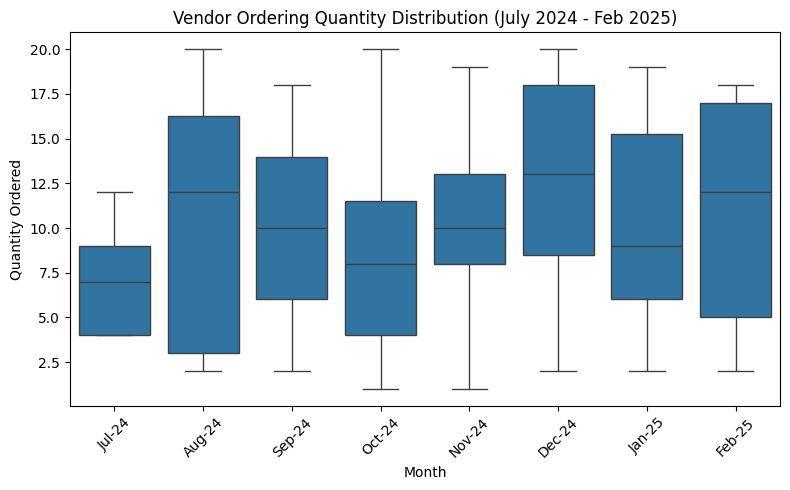

In [5]:
#irregular vendor box plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = 'Kamalai_Organics_Sales_July2024_Feb2025.csv'
df = pd.read_csv(file_path)

# Filter only vendor orders
vendor_orders = df[df['Sales_Channel'].str.lower() == 'vendor'].copy()

# Convert Date to datetime and extract month-year in "Month-YY" format
vendor_orders['Date'] = pd.to_datetime(vendor_orders['Date'], dayfirst=True)
vendor_orders['Order_Month'] = vendor_orders['Date'].dt.strftime('%b-%y')

# Sort by date to ensure proper month order
vendor_orders = vendor_orders.sort_values('Date')

# Get unique months in chronological order
month_order = vendor_orders['Order_Month'].unique()

# Plot boxplot for Quantity_Sold by month
plt.figure(figsize=(8, 5))
sns.boxplot(data=vendor_orders, x='Order_Month', y='Quantity_Sold', order=month_order)
plt.title('Vendor Ordering Quantity Distribution (July 2024 - Feb 2025)')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


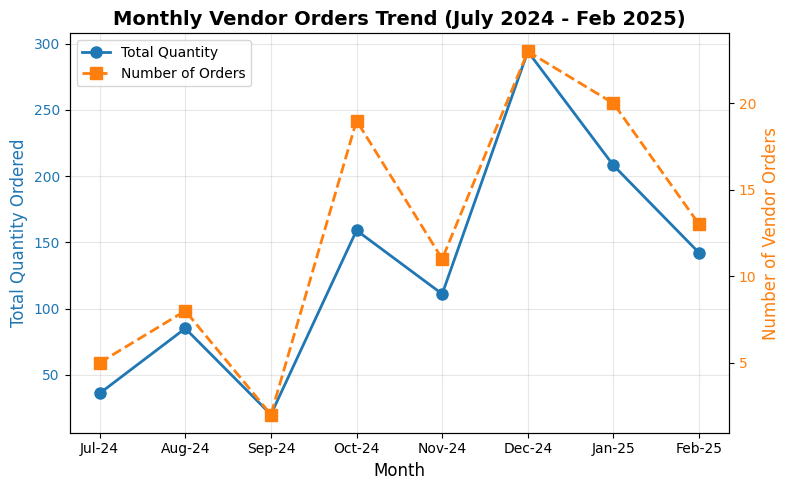


=== Monthly Vendor Orders Summary ===
  Month  Total_Quantity  Number_of_Orders Month_Label
2024-07              36                 5      Jul-24
2024-08              85                 8      Aug-24
2024-09              20                 2      Sep-24
2024-10             159                19      Oct-24
2024-11             111                11      Nov-24
2024-12             294                23      Dec-24
2025-01             208                20      Jan-25
2025-02             142                13      Feb-25

=== Key Insights ===
Highest ordering month: Dec-24 (294 units)
Lowest ordering month: Sep-24 (20 units)
Average monthly orders: 131.88 units
Average number of vendor transactions per month: 12.62


In [6]:
#irregual vendor line chart  Monthly Vendor Orders Trend
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'Kamalai_Organics_Sales_July2024_Feb2025.csv'
df = pd.read_csv(file_path)

# Filter only vendor orders
vendor_orders = df[df['Sales_Channel'].str.lower() == 'vendor'].copy()

# Convert Date to datetime
vendor_orders['Date'] = pd.to_datetime(vendor_orders['Date'], dayfirst=True)
vendor_orders['Order_Month'] = vendor_orders['Date'].dt.to_period('M')

# Group by month and calculate metrics
monthly_trend = vendor_orders.groupby('Order_Month').agg({
    'Quantity_Sold': 'sum',  # Total quantity ordered per month
    'Date': 'count'           # Number of vendor orders per month
}).reset_index()

monthly_trend.columns = ['Month', 'Total_Quantity', 'Number_of_Orders']

# Convert Period to string format "Month-YY"
monthly_trend['Month_Label'] = monthly_trend['Month'].dt.strftime('%b-%y')

# Create line chart
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot total quantity ordered
color1 = 'tab:blue'
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Quantity Ordered', color=color1, fontsize=12)
ax1.plot(monthly_trend['Month_Label'], monthly_trend['Total_Quantity'], 
         marker='o', color=color1, linewidth=2, markersize=8, label='Total Quantity')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Create second y-axis for number of orders
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Number of Vendor Orders', color=color2, fontsize=12)
ax2.plot(monthly_trend['Month_Label'], monthly_trend['Number_of_Orders'], 
         marker='s', color=color2, linewidth=2, markersize=8, linestyle='--', label='Number of Orders')
ax2.tick_params(axis='y', labelcolor=color2)

# Title and layout
plt.title('Monthly Vendor Orders Trend (July 2024 - Feb 2025)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
fig.tight_layout()

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

# Print summary statistics
print("\n=== Monthly Vendor Orders Summary ===")
print(monthly_trend.to_string(index=False))
print("\n=== Key Insights ===")
print(f"Highest ordering month: {monthly_trend.loc[monthly_trend['Total_Quantity'].idxmax(), 'Month_Label']} ({monthly_trend['Total_Quantity'].max()} units)")
print(f"Lowest ordering month: {monthly_trend.loc[monthly_trend['Total_Quantity'].idxmin(), 'Month_Label']} ({monthly_trend['Total_Quantity'].min()} units)")
print(f"Average monthly orders: {monthly_trend['Total_Quantity'].mean():.2f} units")
print(f"Average number of vendor transactions per month: {monthly_trend['Number_of_Orders'].mean():.2f}")


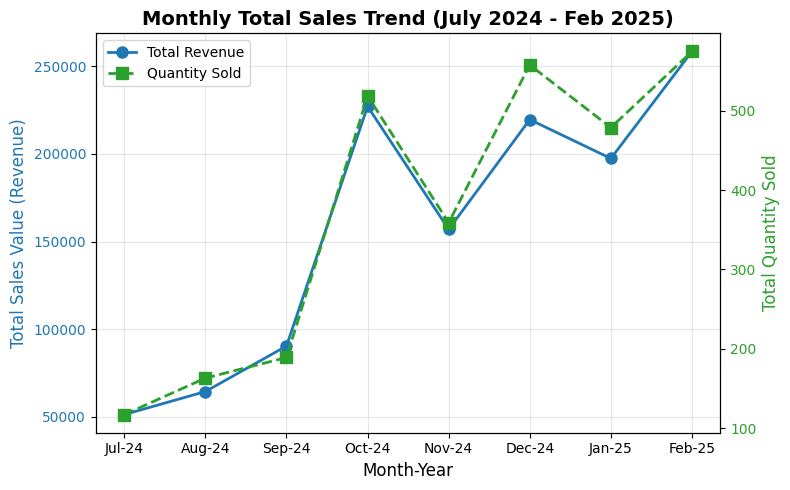

In [7]:
#fluctuating demand line chart monthly total sales trend
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'Kamalai_Organics_Sales_July2024_Feb2025.csv'
df = pd.read_csv(file_path)

# Parse dates and format month labels as 'Jul-24'
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month_Label'] = df['Date'].dt.strftime('%b-%y')

# Group by month for total sales value and quantity
monthly_sales = df.groupby('Month_Label').agg({
    'Revenue': 'sum',
    'Quantity_Sold': 'sum'
}).reset_index()

# Ensure chronological order for months
unique_months = df.sort_values('Date')['Month_Label'].unique()
monthly_sales['Month_Label'] = pd.Categorical(monthly_sales['Month_Label'], categories=unique_months, ordered=True)
monthly_sales = monthly_sales.sort_values('Month_Label')

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

color1 = 'tab:blue'
ax1.set_xlabel('Month-Year', fontsize=12)
ax1.set_ylabel('Total Sales Value (Revenue)', color=color1, fontsize=12)
ax1.plot(monthly_sales['Month_Label'], monthly_sales['Revenue'], 
         marker='o', color=color1, linewidth=2, markersize=8, label='Total Revenue')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Second y-axis for Quantity Sold
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Total Quantity Sold', color=color2, fontsize=12)
ax2.plot(monthly_sales['Month_Label'], monthly_sales['Quantity_Sold'], 
         marker='s', color=color2, linewidth=2, markersize=8, linestyle='--', label='Quantity Sold')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Monthly Total Sales Trend (July 2024 - Feb 2025)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
fig.tight_layout()

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_19472\3640099889.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg_revenue, x='Month_Label', y='Revenue', palette='Blues_d')


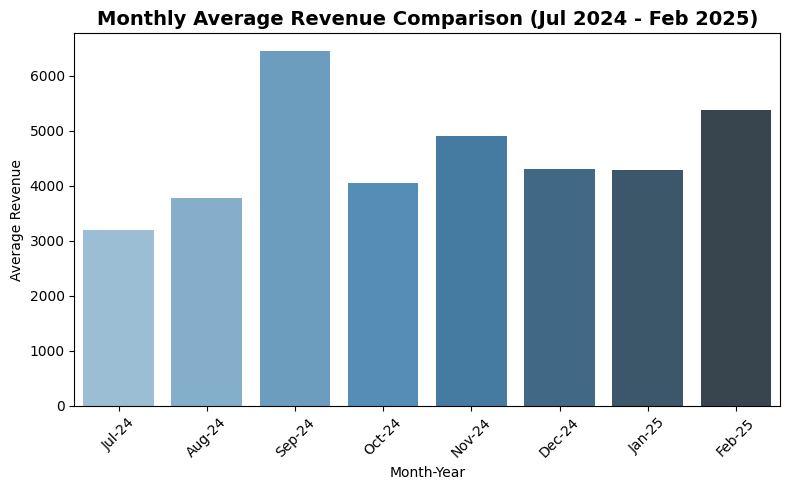

In [8]:
#fluctuating demand bar chart monthly avg revenue comparison
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = 'Kamalai_Organics_Sales_July2024_Feb2025.csv'
df = pd.read_csv(file_path)

# Convert Date to datetime and create month label
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month_Label'] = df['Date'].dt.strftime('%b-%y')

# Group by month and calculate average revenue
monthly_avg_revenue = df.groupby('Month_Label')['Revenue'].mean().reset_index()

# Ensure months are in chronological order
unique_months = df.sort_values('Date')['Month_Label'].unique()
monthly_avg_revenue['Month_Label'] = pd.Categorical(monthly_avg_revenue['Month_Label'], categories=unique_months, ordered=True)
monthly_avg_revenue = monthly_avg_revenue.sort_values('Month_Label')

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_avg_revenue, x='Month_Label', y='Revenue', palette='Blues_d')

plt.title('Monthly Average Revenue Comparison (Jul 2024 - Feb 2025)', fontsize=14, fontweight='bold')
plt.xlabel('Month-Year')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


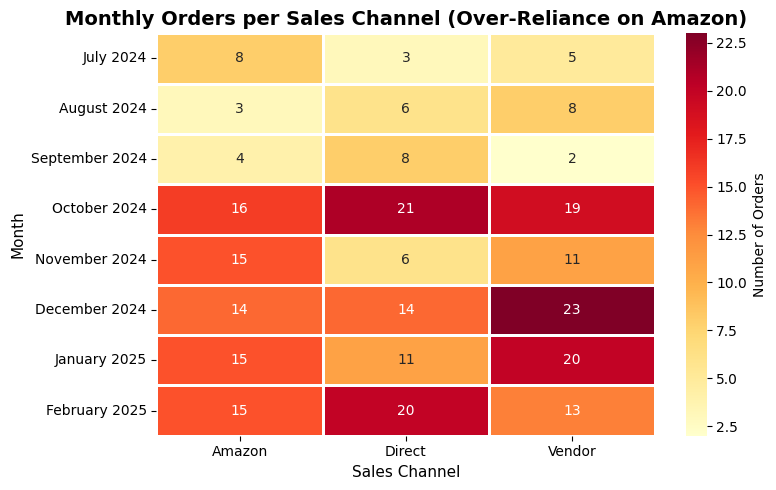


=== Order Count Summary by Channel ===

Sales_Channel
Vendor    101
Amazon     90
Direct     89

=== Monthly Order Distribution ===
Sales_Channel   Amazon  Direct  Vendor
Month_Label                           
July 2024            8       3       5
August 2024          3       6       8
September 2024       4       8       2
October 2024        16      21      19
November 2024       15       6      11
December 2024       14      14      23
January 2025        15      11      20
February 2025       15      20      13


In [9]:
#platform dependency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = 'Kamalai_Organics_Sales_July2024_Feb2025.csv'
df = pd.read_csv(file_path)

# Convert Date to datetime and create month label
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month_Label'] = df['Date'].dt.strftime('%B %Y')

# Pivot table: Rows = Months, Columns = Sales Channel, Values = Count of Orders
heatmap_data = df.pivot_table(
    index='Month_Label',
    columns='Sales_Channel',
    values='Date',  # Use any column and count occurrences
    aggfunc='count',  # Count the number of orders
    fill_value=0
)

# Ensure rows are in chronological order
month_order = ['July 2024', 'August 2024', 'September 2024', 'October 2024', 
               'November 2024', 'December 2024', 'January 2025', 'February 2025']
heatmap_data = heatmap_data.reindex(month_order)

# Create heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=1, linecolor='white', cbar_kws={'label': 'Number of Orders'})

plt.title('Monthly Orders per Sales Channel (Over-Reliance on Amazon)', fontsize=14, fontweight='bold')
plt.xlabel('Sales Channel', fontsize=11)
plt.ylabel('Month', fontsize=11)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Order Count Summary by Channel ===\n")
channel_order_count = df.groupby('Sales_Channel').size().sort_values(ascending=False)
print(channel_order_count.to_string())

print("\n=== Monthly Order Distribution ===")
monthly_counts = df.groupby(['Month_Label', 'Sales_Channel']).size().unstack(fill_value=0)
print(monthly_counts.reindex(month_order).to_string())


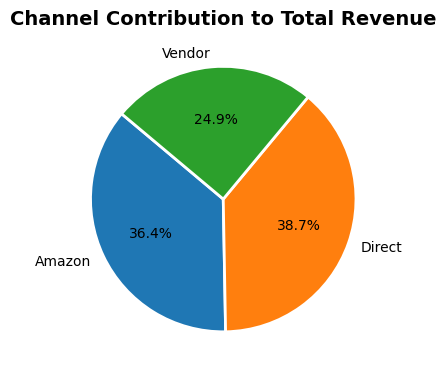

Channel Revenue Percentages:
Amazon: 36.39%
Direct: 38.68%
Vendor: 24.93%


In [10]:
#platform dependency
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'Kamalai_Organics_Sales_July2024_Feb2025.csv'
df = pd.read_csv(file_path)

# Aggregate revenue by channel
channel_revenue = df.groupby('Sales_Channel')['Revenue'].sum()

# Calculate percentage shares
percentages = (channel_revenue / channel_revenue.sum() * 100).round(2)

# Pie chart
plt.figure(figsize=(4,4))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Color for each channel
plt.pie(channel_revenue, labels=channel_revenue.index, autopct='%1.1f%%',
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.title('Channel Contribution to Total Revenue', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print percentages for reference
print("Channel Revenue Percentages:")
for channel, pct in percentages.items():
    print(f"{channel}: {pct}%")


In [11]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Kamalai_Organics_Sales_July2024_Feb2025.csv')

# Parse date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Revenue per transaction
df['Calculated_Revenue'] = df['Quantity_Sold'] * df['Selling_Price_Per_Unit']

# Turnover (assuming 'Return_Flag' means full order returned, discounts not available)
df['Returns'] = (df['Return_Flag'] == 'Yes').astype(int) * df['Calculated_Revenue']
df['Turnover'] = df['Calculated_Revenue'] - df['Returns']

# Cost per transaction
df['Cost'] = df['Quantity_Sold'] * df['Cost_Price_Per_Unit']

# Daily aggregated profit (prefer 'Profit' column if present)
daily_profit = df.groupby('Date')['Profit'].sum()
avg_daily_profit = daily_profit.mean()
min_daily_profit = daily_profit.min()
max_daily_profit = daily_profit.max()

# Financial overview summary
total_revenue = df['Calculated_Revenue'].sum()
total_turnover = df['Turnover'].sum()
total_cost = df['Cost'].sum()

overview = pd.DataFrame({
    'Financial Metric': [
        'Total Revenue',
        'Total Turnover',
        'Total Cost',
        'Avg Daily Profit',
        'Min Daily Profit',
        'Max Daily Profit'
    ],
    'Value': [
        total_revenue,
        total_turnover,
        total_cost,
        avg_daily_profit,
        min_daily_profit,
        max_daily_profit
    ]
})

print(overview)


   Financial Metric         Value
0     Total Revenue  1.265541e+06
1    Total Turnover  1.175339e+06
2        Total Cost  6.400770e+05
3  Avg Daily Profit  3.884870e+03
4  Min Daily Profit  1.830000e+02
5  Max Daily Profit  1.546900e+04


In [12]:
import pandas as pd
# Load the dataset
file_path = 'Kamalai_Organics_Sales_July2024_Feb2025.csv'
df = pd.read_csv(file_path)

# Calculate total revenue and cost by channel
df['Calculated_Revenue'] = df['Quantity_Sold'] * df['Selling_Price_Per_Unit']
df['Calculated_Cost'] = df['Quantity_Sold'] * df['Cost_Price_Per_Unit']

# Aggregate metrics by channel
grouped = df.groupby('Sales_Channel').agg(
    Orders=('Quantity_Sold','count'),
    Total_Units_Sold=('Quantity_Sold','sum'),
    Total_Revenue=('Calculated_Revenue', 'sum'),
    Total_Cost=('Calculated_Cost', 'sum'),
    Total_Profit=('Profit','sum')
).reset_index()

# Add averages
grouped['Avg_Revenue_per_Order'] = (grouped['Total_Revenue'] / grouped['Orders']).round()
grouped['Avg_Profit_per_Order'] = (grouped['Total_Profit'] / grouped['Orders']).round()

# Convert all to whole numbers
grouped = grouped.round(0).astype({'Orders': int, 'Total_Units_Sold': int, 'Total_Revenue': int,
                                   'Total_Cost': int, 'Total_Profit': int,
                                   'Avg_Revenue_per_Order': int, 'Avg_Profit_per_Order': int})

print(grouped.to_string(index=False))


Sales_Channel  Orders  Total_Units_Sold  Total_Revenue  Total_Cost  Total_Profit  Avg_Revenue_per_Order  Avg_Profit_per_Order
       Amazon      90               923         460577      199539        261038                   5118                  2900
       Direct      89               981         489519      210197        279322                   5500                  3138
       Vendor     101              1055         315445      230341         85104                   3123                   843
